<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
# Shows the header of our data frame
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
# Shows number of rows and columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Shows the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
# Shows average movie duration of our data frame
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
# Sorts our movies by duration, then we choose the top one by just asking for
# head(1). Then, use that same list but ask for the last one with tail(1)
longest = movies.sort_values(by='duration', ascending=False).head(1)
shortest =movies.sort_values(by='duration', ascending=False).tail(1)
print(longest)
print(shortest)

     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  
     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5, 1.0, 'Number of Movies by Duration')

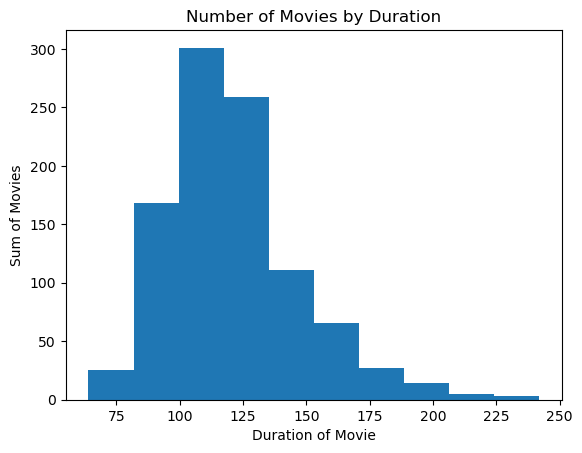

In [7]:
# Answer:
# We plot a histogram, with an x and y axis
# X: duration of movie
# Y: Sum of movies for each bin
plt.hist(movies['duration'], bins=10)
plt.xlabel('Duration of Movie')
plt.ylabel('Sum of Movies')
plt.title('Number of Movies by Duration')

#### Use a box plot to display that same data.

{'whiskers': [<matplotlib.lines.Line2D at 0x22c000831d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c002cc910>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c002c2350>],
 'medians': [<matplotlib.lines.Line2D at 0x22c002cdf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c000672d0>],
 'means': []}

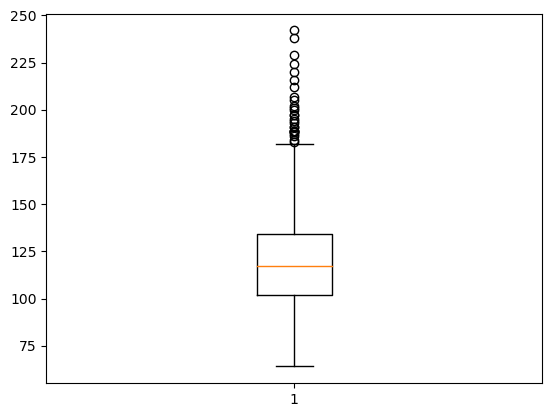

In [8]:
# Answer:
# Plot a boxplot of movies by duration
plt.boxplot(movies['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
# Get number of movies by content rating
movies['content_rating'].value_counts()

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: count, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Number of Movies by Content Rating')

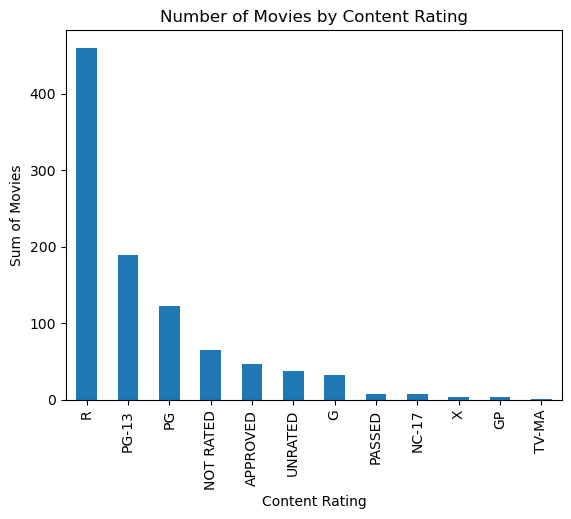

In [10]:
# Answer:
# Make a bar chart for number of movies by content rating
ratings_chart = movies['content_rating'].value_counts()
ratings_chart.plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Sum of Movies')
plt.title('Number of Movies by Content Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Just check how many of each movie by content rating we have
movies['content_rating'].value_counts()

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: count, dtype: int64

In [12]:
# Answer:
# We replace each of those values with in the data frame "UNRATED"
movies = movies.replace(to_replace=["NOT RATED", "APPROVED", "PASSED", "GP"], value="UNRATED")
movies['content_rating'].value_counts()

content_rating
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: count, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
# Do the same thing here, but now with replacing values with NC-17
movies = movies.replace(to_replace=["X", "TV-MA"], value="NC-17")
movies['content_rating'].value_counts()

content_rating
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: count, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Answer:
# This will sum all the missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
# This will find the null values, and fill them in with "NOT RATED"
movies = movies.fillna("NOT RATED")

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
# This looks in the movies data frame, in the duration column, but only 
# the datapoints equal to or greater than 120, then gets the mean of star 
# rating 
Hours_2 = movies[movies['duration'] >= 120]['star_rating'].mean()

# Do the same thing, but only for data points below 120
Hours_less_than_2 = movies[movies['duration'] < 120]['star_rating'].mean()
print(f' Average star rating for movies longer than 2 hours: {Hours_2}, vs. Average star rating of movies less than 2 hours: {Hours_less_than_2}')

 Average star rating for movies longer than 2 hours: 7.948898678414097, vs. Average star rating of movies less than 2 hours: 7.838666666666665


#### Use a visualization to detect whether there is a relationship between duration and star rating.

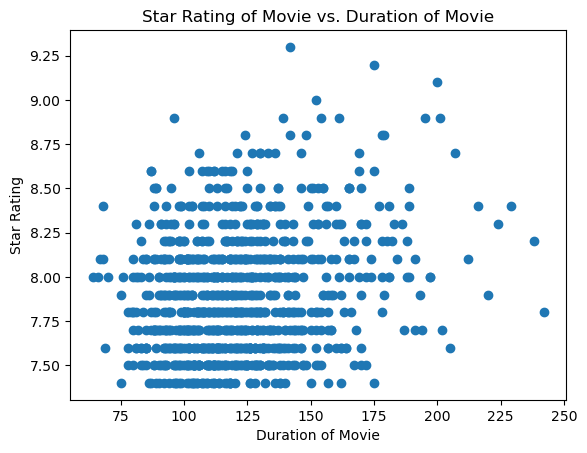

In [17]:
# Answer:

# Plots a scatterplot with duration as our x axis and star rating as our 
# y axis
plt.scatter(movies['duration'], movies['star_rating'])
plt.xlabel('Duration of Movie')
plt.ylabel('Star Rating')
plt.title('Star Rating of Movie vs. Duration of Movie')
plt.show()

#### Calculate the average duration for each genre.

In [18]:
# Answer:
# This groups our data by genre, then calculates the mean within that group
answer = movies.groupby('genre')['duration'].mean()
print(f'Average duration for each genre: {answer}')

Average duration for each genre: genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64


## Advanced level

#### Visualize the relationship between content rating and duration.

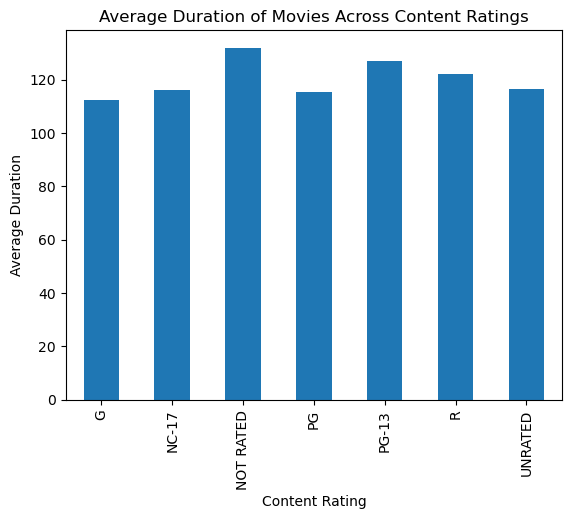

In [19]:
# Ask what they're looking for here: do they want average duration for each content rating?
# Answer:

# First, we groupby content rating, then get the average duration of those groups
movies_dur = movies.groupby('content_rating')['duration'].mean()

# Next, we plot it as a bar graph, with content rating for our x axis and 
# averge duration as our y axis
movies_dur.plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Average Duration')
plt.title('Average Duration of Movies Across Content Ratings')
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [20]:
# Answer:
# Sort our dataframe by star rating
top_star = movies.sort_values(by='star_rating', ascending=False)

# Then, we group that sorted dataframe by genre, then ask to return the top one
# with head(1), then output the title, genre, and star rating
top_star.groupby('genre').head(1)[['title', 'genre', 'star_rating']]

,title,genre,star_rating
0,The Shawshank Redemption,Crime,9.3
3,The Dark Knight,Action,9.0
5,12 Angry Men,Drama,8.9
6,"The Good, the Bad and the Ugly",Western,8.9
7,The Lord of the Rings: The Return of the King,Adventure,8.9
8,Schindler's List,Biography,8.9
39,Psycho,Horror,8.6
38,Rear Window,Mystery,8.6
35,Modern Times,Comedy,8.6
30,Spirited Away,Animation,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [21]:
# Answer:
# Check if there are duplicates within  the title column, and sum them
same_title = movies.duplicated(['title']).sum()

# Check if there are duplicates, but now across the entire dataframe, and sum it
same_movie = movies.duplicated().sum()
print(same_title)
print(same_movie)

# Since we have 4 title duplicates but 0 duplicates when we checked across all
# columns, we can deduce they have the same title but are not the same movies
# because if they were duplicate movies, they'd be the same across all columns
# and we'd have more than 0 same_movie duplicates

4
0


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [22]:
# Answer:
# Check the sum of genres 
print(movies['genre'].value_counts())

# Use that to make our list manually
manual_list = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 
              'Animation', 'Horror', 'Mystery']
# We'll filter our dataframe with the manual list we just made
manual_filter = movies[movies['genre'].isin(manual_list)]

# Lastly, we group our data by genre, then calculate the star rating mean
manual_star = manual_filter.groupby('genre')['star_rating'].mean()
print('***********************')
print('Our final answer is:')
print(manual_star)

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: count, dtype: int64
***********************
Our final answer is:
genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [23]:
# Answer:
# Get our genre sums
movies_list = movies['genre'].value_counts()

# Filter this to only include movie genres with 10 or more movies, 
# then use that filter to make a list with just those movies
movies_filter = movies_list >= 10
popular_genres = movies_list[movies_filter].index.tolist()

# Now we make a data frame that only includes movies from that list
filtered_movies = movies[movies['genre'].isin(popular_genres)]

# Lastly, we use group by genres in that data frame and calculate the star 
# rating mean
avg_star = filtered_movies.groupby('genre')['star_rating'].mean()
print(avg_star)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [24]:
# Answer:
# This time, we're switching the order we do things. We'll group the movies
# by genre and then we'll calculate the star rating mean
calc_avg_star = movies.groupby('genre')['star_rating'].mean()

# We'll just use movies_filter from before since that will filter out movies
# that don't meet our condition (at least ten movies in a genre)
filtered_avg_star = calc_avg_star[movies_filter]
print(filtered_avg_star)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 4: aggregate by count and mean, then filter using the count

In [25]:
# Answer:
# Group our data by genre, then use .agg for our star rating mean and our count
count_mean = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])

# We filter this data frame by asking it to only include rows where the count 
# column is at least 10. 
final_answer = count_mean[count_mean['count'] >= 10]
print(final_answer)

           count      mean
genre                     
Action       136  7.884559
Adventure     75  7.933333
Animation     62  7.914516
Biography     77  7.862338
Comedy       156  7.822436
Crime        124  7.916935
Drama        278  7.902518
Horror        29  7.806897
Mystery       16  7.975000


## Bonus

#### Figure out something "interesting" using the actors data!